## SMS Spam Detection

In [1]:
import pandas as pd

## Importing and Cleaning Dataset

In [2]:
data = pd.read_csv("spam1.csv",encoding = 'windows-1252')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df = data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1)

In [4]:
df.rename(columns = {'v1':'Category', 'v2':'Message'}, inplace = True)

In [5]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
pd.value_counts(df['Category'])

ham     4825
spam     747
Name: Category, dtype: int64

In [7]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [8]:
df.drop_duplicates(inplace=True)
df.shape

(5169, 2)

In [9]:
category_count = pd.value_counts(df['Category'])

Text(0, 0.5, 'Frequency')

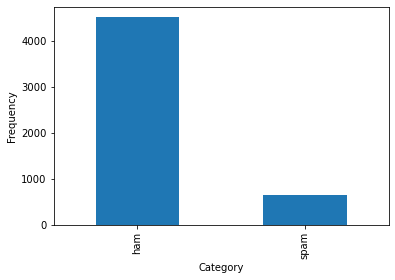

In [10]:
import matplotlib.pyplot as plt
category_count.plot(kind ='bar')
plt.xlabel('Category')
plt.ylabel('Frequency')

In [11]:
df['spam']=df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


## Splitting Data

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.Message,df.spam,test_size=0.25)

## performing Vectorization

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## Applying ML model

In [14]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

In [15]:
X_test_count = v.transform(X_test)
model.score(X_test_count, y_test)

0.982985305491106

In [16]:
emails = [
    'Hey Shivansh, can we go together to play Badminton game tomorrow?',
    'Upto 20% discount on Shoes, exclusive offer just for you. Dont miss this reward!'
]
emails_count = v.transform(emails)
model.predict(emails_count)

array([0, 1], dtype=int64)